In [99]:
# install_packages.py
# This script installs necessary libraries for the ML-Linear Regression project.
import install_packages
install_packages.install_libraries()

ModuleNotFoundError: No module named 'install_packages'

In [100]:
# Import Libereries
import numpy as np
import pandas as pd
import matplotlib  as mpl
import seaborn as sns
import plotly.express as pl
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from PIL import Image

In [101]:
# Open Image by Image Function
image = Image.open("dataset/1.bmp")

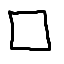

In [102]:
# Show Image (1.bmp) that is open
image

In [103]:
# Transport Image to Array (Numbers)
array_image = np.array(image)

In [104]:
# Show Dimesntion of Array (64 * 64 & RGB)
array_image.shape

(64, 64, 3)

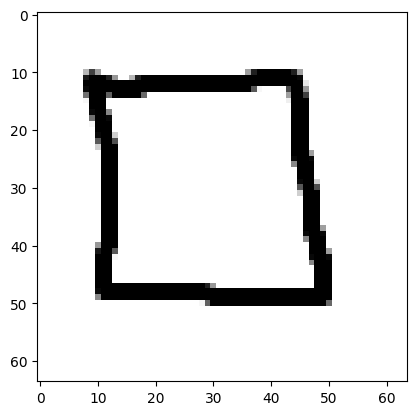

In [105]:
# Show Coordinate of Points in Arrays that make Triangle
plt.imshow(array_image)

In [106]:
# Find that coordinate of 10 * 20 that color is black [Y][X][0 means Black 255 Means White]
array_image[20][10][0]

np.uint8(0)

In [107]:
# now change our array RGB to just Black
array_image_black = array_image [:,:,0]
array_image_black.shape

(64, 64)

In [108]:
# Transport two dimenstional Array (64 * 64) to One Dimesntional (4096 * 1)
array_image_black_flat = array_image_black.reshape(4096)
array_image_black_flat.shape

(4096,)

In [135]:
X = None
# for Funtion to make Dataset for images we have (10 traingles and 10 circles)
for i in range (1,21): #from image 1 to image 20
    images_read = Image.open("dataset/"+ str(i) + ".bmp")  #read 1.bmp, 2.bmp , 3.bmp ,..., 20.bmp
    images_array = np.array(images_read)    #change images to array

 
    images_array_black = images_array [:,:,0] # # now change our array RGB to just Black
    images_array_black_flat = images_array_black.flatten() # Equal like reshape(4096) and make 1 dimention array
    images_array_black_flat = images_array_black_flat / 255  # R color Become 0 - 1 not 0 -z255
    
    if X is None:
        X = np.array([images_array_black_flat])   # array (1,images)
    else:
        X = np.append(X, [images_array_black_flat], axis=0)  # Put first image has converted to array in X

    

In [136]:
# Make y array that first 10 data (Triagle) are 0 and second 10 dat are 1 (cirle)
y = np.array([0]*10 + [1]*10, dtype=int)

In [134]:
X.shape

(20, 4096)

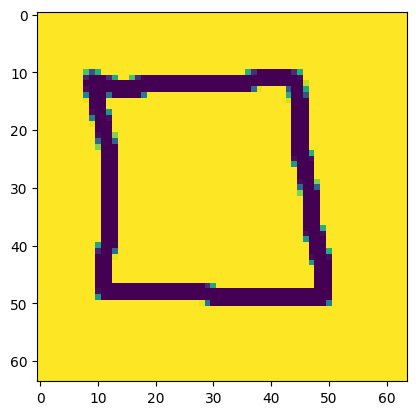

In [138]:
plt.imshow(X[0].reshape(64,64))

In [139]:
# Split 80% Learn and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Choose the Logisitc Regression for Classifation
model = linear_model.LogisticRegression()

In [141]:
# Give data to model to Learn
model.fit(X_train,y_train)

LogisticRegression()

In [142]:
# Predict the X_test to test out model
y_pred = model.predict(X_test)

In [143]:
# show Model results for X_test
y_pred

array([0, 1, 1, 0])

In [144]:
# Real Results for X_test
y_test

array([0, 1, 1, 0])

In [147]:
# Show Which Results are Wrong
error = y_test - y_pred 

In [153]:
# Show numbers of true and wrong predict of model
wrong = 0
true = 0
for a in error:
    if (a == 0):
        true += 1
    if (a!=0):
        wrong += 1

print ("Total Number of Test:" , true + wrong)
print ("Numbers of true:" , true)
print ("Percent of true:" , (true*100/4))
print ("Numbers of wrong:" , wrong)
print ("Percent of wrong:" , (wrong*100/4))

Total Number of Test: 4
Numbers of true: 4
Percent of true: 100.0
Numbers of wrong: 0
Percent of wrong: 0.0
